## 練習問題 (A)

In [1]:
import math
import numpy as np


def G_carrier_real(t, freq, phase):
    '''
    Real part of the carrier.
    '''
    topass = 2 * math.pi * freq * t + phase
    out = np.cos(topass)
    return out

def G_carrier_imag(t, freq, phase):
    '''
    Imaginary part of the carrier.
    '''
    topass = 2 * math.pi * freq * t + phase
    out = np.sin(topass)
    return out


def G_envelope(t, amp, sdev):
    '''
    The impact of the filter is controlled by a Gaussian function.
    '''
    out = amp * np.exp( (-(t/sdev)**2) )
    return out


def G_fil_real(t, paras):
    '''
    Custom-built filter response (real part).
    Assumes that t is an array of temporal inputs.
    '''
    carrier = G_carrier_real(t=t, freq=paras["freq"], phase=paras["phase"])
    envelope = G_envelope(t=t, amp=paras["amp"], sdev=paras["sdev"])
    out = carrier * envelope
    return out

def G_fil_imag(t, paras):
    '''
    Custom-built filter response (imaginary part).
    Assumes that t is an array of temporal inputs.
    '''
    carrier = G_carrier_imag(t=t, freq=paras["freq"], phase=paras["phase"])
    envelope = G_envelope(t=t, amp=paras["amp"], sdev=paras["sdev"])
    out = carrier * envelope
    return out

### A-1

`freq`が単位時間あたりの周波数を目視し、以下のようになることを確認した。

* `freq=1`: 単位時間あたりの振動が1回
* `freq=2`: 単位時間あたりの振動が2回
* `freq=0.5`: 単位時間あたりの振動が0.5回（２秒で１回の振動）

### A-2

`sdev`はガウス関数の標準偏差で、`sdev`が小さいほどシャープなガウス関数となりエッジの効いたガボールフィルターとなる。

### A-3

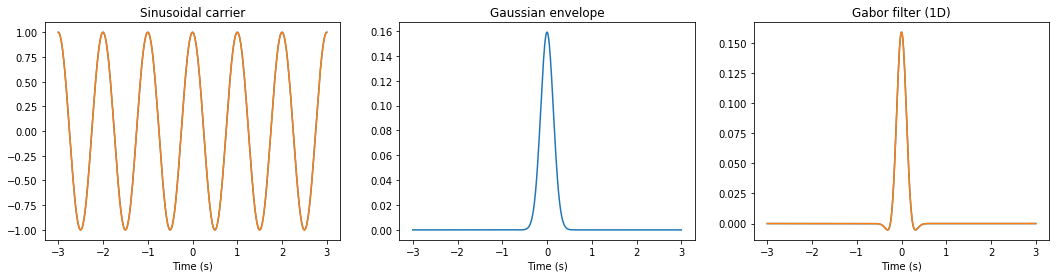

In [2]:
myparas = {"amp": 1/(2*math.pi),
           "sdev": 0.2,
           "freq": 1,
           "phase": 0}


import matplotlib.pyplot as plt

myfig = plt.figure(figsize=(18,4))
t_inputs = np.linspace(-3,3,500)

ax_carrier = myfig.add_subplot(1,3,1)
plt.title("Sinusoidal carrier")
plt.xlabel("Time (s)")
ax_envelope = myfig.add_subplot(1,3,2)
plt.title("Gaussian envelope")
plt.xlabel("Time (s)")
ax_filter = myfig.add_subplot(1,3,3)
plt.title("Gabor filter (1D)")
plt.xlabel("Time (s)")

ax_carrier.plot(t_inputs, G_carrier_real(t=t_inputs, freq=myparas["freq"], phase=myparas["phase"]))
ax_carrier.plot(t_inputs, G_carrier_imag(t=t_inputs, freq=myparas["freq"], phase=myparas["phase"] + (math.pi * 0.5)))

ax_envelope.plot(t_inputs, G_envelope(t=t_inputs, amp=myparas["amp"], sdev=myparas["sdev"]))

ax_filter.plot(t_inputs, G_fil_real(t=t_inputs, paras=myparas))
myparas['phase'] += (math.pi * 0.5)
ax_filter.plot(t_inputs, G_fil_imag(t=t_inputs, paras=myparas))

plt.show()


## 練習問題 (B)

### B-3

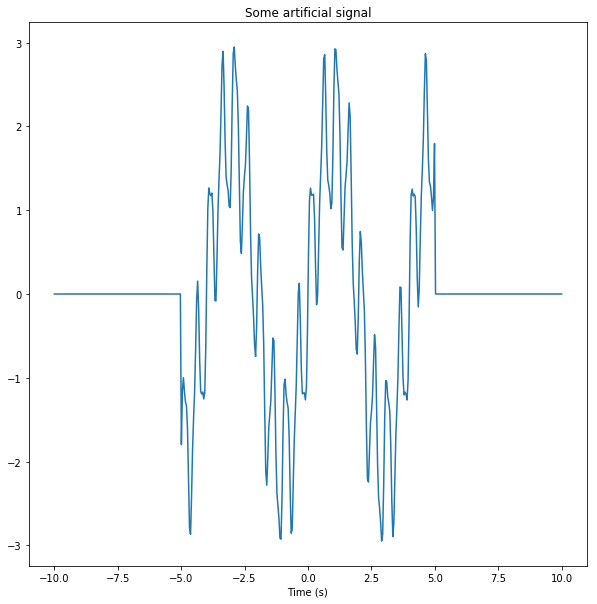

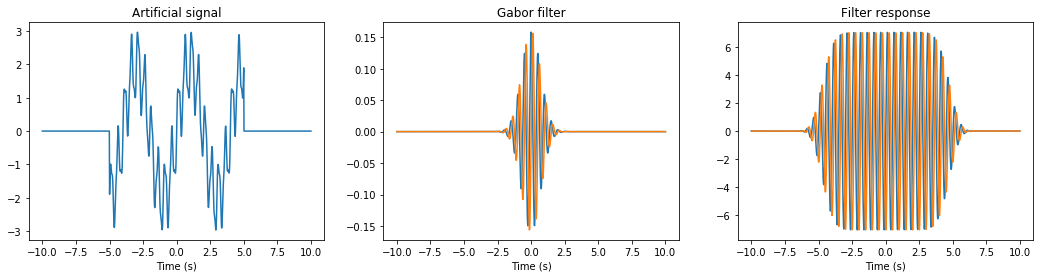

In [3]:
para_HIGHFREQ = 5
para_MIDFREQ = 2
para_LOWFREQ = 0.25

def my_signal(t):
    
    highfreq = 0.25 * np.sin((2*math.pi*para_HIGHFREQ*t))
    midfreq = 1 * np.sin((2*math.pi*para_MIDFREQ*t))
    lowfreq = 2 * np.sin((2*math.pi*para_LOWFREQ*t))
    
    cond = (np.abs(t) <= 5)
    signal = highfreq + midfreq + lowfreq
    out = np.select([cond], [signal])
    
    return out


myfig = plt.figure(figsize=(10,10))
t_inputs = np.linspace(-10, 10, 500)

plt.plot(t_inputs, my_signal(t=t_inputs))
plt.title("Some artificial signal")
plt.xlabel("Time (s)")
plt.show()

from scipy import signal

t_inputs = np.linspace(-10, 10, 1000)
sig_values = my_signal(t=t_inputs)

myparas = {"amp": 1/(2*math.pi),
           "sdev": 1,
           "freq": 2,
           "phase": 0}
fil_values_real = G_fil_real(t=t_inputs, paras=myparas)
fil_values_imag = G_fil_imag(t=t_inputs, paras=myparas)
fil_response_real = signal.convolve(sig_values, fil_values_real, mode="same")
fil_response_imag = signal.convolve(sig_values, fil_values_imag, mode="same")

myfig = plt.figure(figsize=(18,4))

ax_signal = myfig.add_subplot(1,3,1)
plt.title("Artificial signal")
plt.xlabel("Time (s)")
ax_filter = myfig.add_subplot(1,3,2)
plt.title("Gabor filter")
plt.xlabel("Time (s)")
ax_response = myfig.add_subplot(1,3,3)
plt.title("Filter response")
plt.xlabel("Time (s)")

ax_signal.plot(t_inputs, sig_values)

ax_filter.plot(t_inputs, fil_values_real)
ax_filter.plot(t_inputs, fil_values_imag)

ax_response.plot(t_inputs, fil_response_real)
ax_response.plot(t_inputs, fil_response_imag)

plt.show()

## 練習問題 (C)

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt


def G2_carrier_real(x, y, freqx, freqy, phase):
    '''
    Real part of the 2-D Gabor carrier.
    '''
    topass = 2 * math.pi * (freqx*x + freqy*y) + phase
    out = np.cos(topass)
    return out


def G2_carrier_imag(x, y, freqx, freqy, phase):
    '''
    Imaginary part of the 2-D Gabor carrier.
    '''
    topass = 2 * math.pi * (freqx*x + freqy*y) + phase
    out = np.sin(topass)
    return out


def G2_envelope(x, y, amp, sdev):
    '''
    Gaussian envelope for a 2-D Gabor filter.
    We assume that it is circular (same rate of decrease in x/y directions).
    '''
    out = amp * np.exp(-(x**2+y**2)/(sdev**2))
    return out


def G2_fil_real(x, y, paras):
    '''
    Custom-built filter response (real part).
    '''
    # Spatial frequency in polar coordinates.
    u = paras["freqs"] * math.cos(paras["dir"])
    v = paras["freqs"] * math.sin(paras["dir"])
    # Computations.
    carrier = G2_carrier_real(x=x, y=y, freqx=u, freqy=v, phase=paras["phase"])
    envelope = G2_envelope(x=x, y=y, amp=paras["amp"], sdev=paras["sdev"])
    out = carrier * envelope
    return out

def G2_fil_imag(x, y, paras):
    '''
    Custom-built filter response (imaginary part).
    '''
    # Spatial frequency in polar coordinates.
    u = paras["freqs"] * math.cos(paras["dir"])
    v = paras["freqs"] * math.sin(paras["dir"])
    # Computations.
    carrier = G2_carrier_imag(x=x, y=y, freqx=u, freqy=v, phase=paras["phase"])
    envelope = G2_envelope(x=x, y=y, amp=paras["amp"], sdev=paras["sdev"])
    out = carrier * envelope
    return out

### c-1

`dir`を変更することで検出したいエッジの方向が変わる。

* $dir=0$: 横方向のエッジを検出できる
* $dir=\pi/2$: 縦方向のエッジを検出できる

### c-2, c-3

In [5]:
def draw_2d_filter(nums, radius):
    
    PIX_W = 128 # image width, in pixels
    PIX_H = 128 # image height, in pixels
    myparas = {"freqs": nums/max(PIX_W,PIX_H), # cycles per pixel
               "dir": 0, # orientation
               "amp": 1,
               "sdev": max(PIX_W,PIX_H) * radius,
               "phase": 0}


    myfig = plt.figure(figsize=(18,4))

    y0 = math.floor(PIX_H/2)
    x0 = math.floor(PIX_W/2)
    y_inputs, x_inputs = np.mgrid[-y0:(y0+1), -x0:(x0+1)]

    # Store pixel values (of envelope, carrier, filter) for plotting via imshow.
    out_envelope = G2_envelope(x=x_inputs, y=y_inputs,
                                 amp=myparas["amp"],
                                 sdev=myparas["sdev"])
    out_carrier = G2_carrier_imag(x=x_inputs,
                                  y=y_inputs,
                                  freqx=myparas["freqs"]*math.cos(myparas["dir"]),
                                  freqy=myparas["freqs"]*math.sin(myparas["dir"]),
                                  phase=myparas["phase"])
    out_filter = G2_fil_imag(x=x_inputs, y=y_inputs, paras=myparas)


    ax_carrier = myfig.add_subplot(1,3,1)
    plt.title("Sinusoidal carrier")
    topass = ax_carrier.imshow(out_carrier, cmap=plt.cm.BuPu_r)
    plt.colorbar(topass)

    ax_envelope = myfig.add_subplot(1,3,2)
    plt.title("Gaussian envelope")
    topass = ax_envelope.imshow(out_envelope, cmap=plt.cm.BuPu_r)
    plt.colorbar(topass)

    ax_filter = myfig.add_subplot(1,3,3)
    plt.title("Gabor filter (2D)")
    topass = ax_filter.imshow(out_filter, cmap=plt.cm.BuPu_r)
    plt.colorbar(topass)

    plt.show()


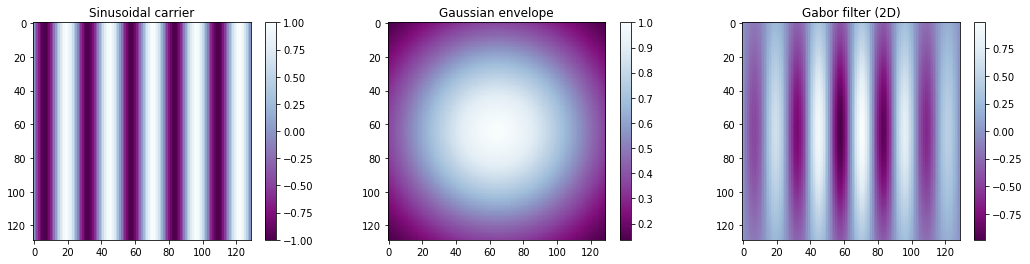

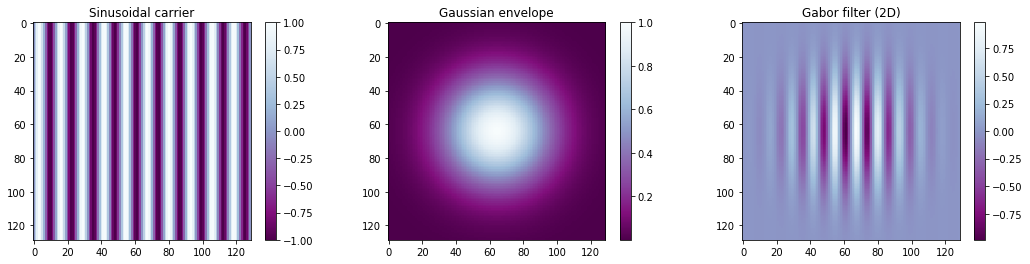

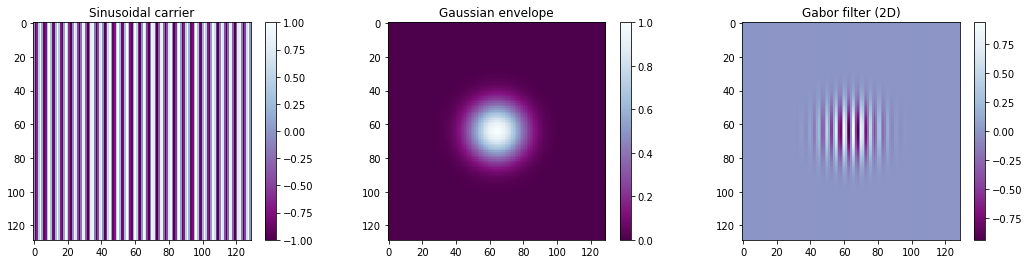

In [6]:
# 5周
draw_2d_filter(5, 1.0/2.0)

# 10周
draw_2d_filter(10, 1.0/4.0)

# 25周
draw_2d_filter(25, 1.0/8.0)

## 練習問題 (D)

### D-1

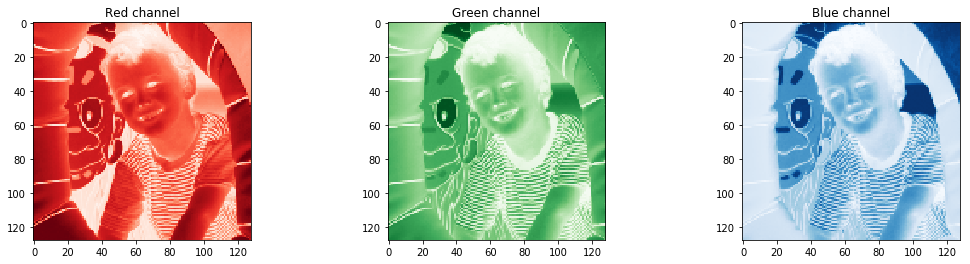

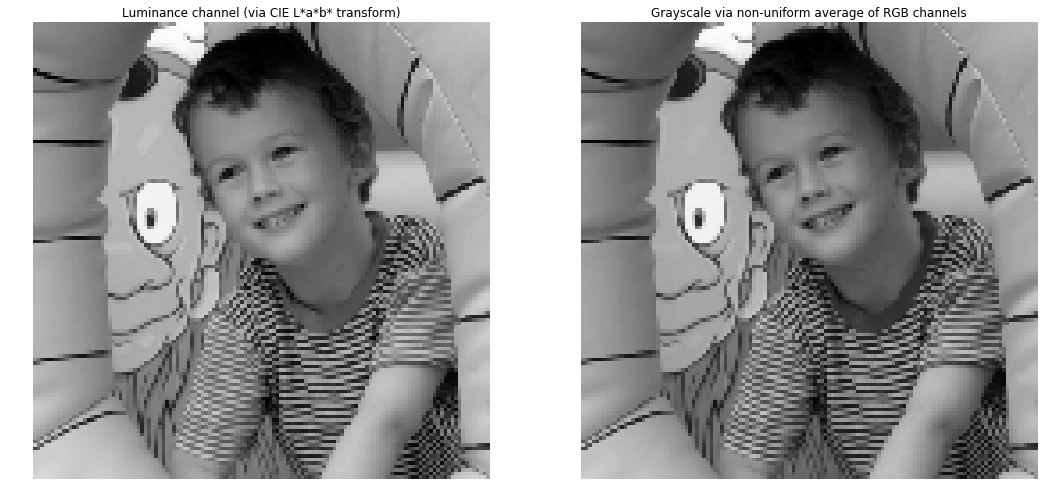

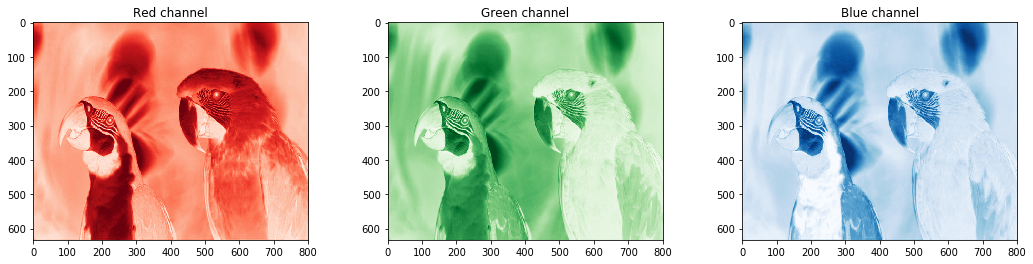

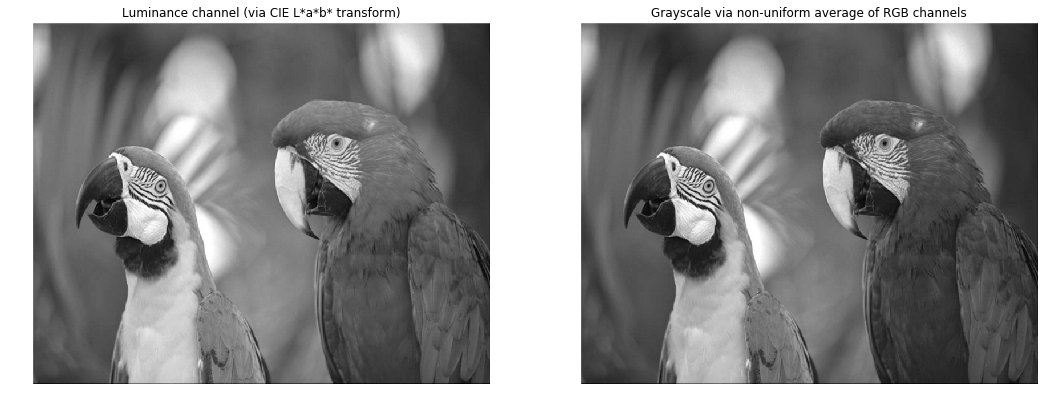

end


In [7]:
import imageio
from skimage import color as col

def get_lab(path, draw=True):

    # Read images from file.
    im = imageio.imread(path)

    if draw:

        myfig = plt.figure(figsize=(18,4))
        ax_R = myfig.add_subplot(1,3,1)
        plt.title("Red channel")
        ax_G = myfig.add_subplot(1,3,2)
        plt.title("Green channel")
        ax_B = myfig.add_subplot(1,3,3)
        plt.title("Blue channel")

        ax_R.imshow(im[:,:,0], cmap=plt.cm.Reds)
        ax_G.imshow(im[:,:,1], cmap=plt.cm.Greens)
        ax_B.imshow(im[:,:,2], cmap=plt.cm.Blues)
    
        plt.show()

    # Re-read the original image from file.
    im_xyz = col.rgb2xyz(im) # convert from RGB to XYZ colour space
    im_cielab = col.xyz2lab(im_xyz) # convert from XYZ to CIE L*a*b* colour space.

    im_L = im_cielab[:,:,0] # the luminance channel of CIE-Lab.
    im_gs = col.rgb2gray(im) # the "luminance" by a non-uniform weighted ave of RGB.

    if draw:

        myfig = plt.figure(figsize=(18,9))
        ax_L = myfig.add_subplot(1,2,1)
    
        plt.title("Luminance channel (via CIE L*a*b* transform)")
        plt.axis("off")
        ax_gs = myfig.add_subplot(1,2,2)
        plt.title("Grayscale via non-uniform average of RGB channels")
        plt.axis("off")
        ax_L.imshow(im_L, cmap=plt.get_cmap('gray'))
        ax_gs.imshow(im_gs, cmap=plt.get_cmap('gray'))

        plt.show()
    
    return im_L

# bishop
get_lab("img/bishop.png")

# parrots
get_lab("img/parrots.png")

print('end')


## 練習問題 (E)

### E-1

* `dir`
`freqs`が大きいと、方向の変化と出力のマップが直感と一致しなかった。ただ、ある程度`freqs`小さくすると肉眼でも確認しやすい低周波の特徴を検知できるため、直感と一致するようになった。


* `freqs`
肉眼では特に注目していなかった場所でも、高周波にすると出力のヒートマップが大きくなることがあった。


* `stdev`
ガウシアンフィルターのパラメータであるが、この値が大きいほどシャープなフィルターとなる。この値によるヒートマップの変化は直感通りで、値が大きいほどヒートマップの反応の強い部分が少なくなった。

* `n_stds`
値を大きくすると計算量が多くなり演算に時間がかかる。また裾野のデータは誤差の範囲なのであまり大きくする必要はない。
逆に値を小さくすると高周波成分の影響からか縞のようなものが出てきた。



### E-2

In [22]:
from skimage import filters as skfil
from scipy import ndimage as ndi

def fil_kernel(paras, n_stds=3):
    '''
    Complex values of 2D Gabor filter, for use in convolution.
    When applied to images, this is typically called
    The linear size of the filter is determined as a multiple
    of the standard deviation of the Gaussian envelope, and the
    values passed to the filter are symmetric about zero.
    
    USAGE: pass the parameters only; the size of the grid of
    response values generated depends on these.
    '''
    
    pixnum = 2*math.ceil(n_stds*paras["sdev"])
    
    y0 = pixnum/2
    x0 = pixnum/2
    y, x = np.mgrid[-y0:(y0+1), -x0:(x0+1)]
    
    # Spatial frequency in polar coordinates.
    u = paras["freqs"] * math.cos(paras["dir"])
    v = paras["freqs"] * math.sin(paras["dir"])
    # Computations.
    envelope = G2_envelope(x=x, y=y,
                           amp=paras["amp"]/(2*math.pi*paras["sdev"]**2),
                           sdev=paras["sdev"])
    out = {"real": None, "imag": None}
    out["real"] = envelope * G2_carrier_real(x=x, y=y, freqx=u, freqy=v, phase=paras["phase"])
    out["imag"] = envelope * G2_carrier_imag(x=x, y=y, freqx=u, freqy=v, phase=paras["phase"])
    
    return out

def draw_heatmap(path, params, n_stds):

    im = imageio.imread(path)
    im_L = col.xyz2lab(col.rgb2xyz(im))[:,:,0]
    PIX_H = im_L.shape[0]
    PIX_W = im_L.shape[1]

    mymode = "reflect"
    mycval = 0

    fil_values = fil_kernel(paras=params, n_stds=n_stds)

    print("Convolving w/ real part (takes time)...", end=" ")
    fil_response_real = ndi.convolve(input=im_L, weights=fil_values["real"], mode=mymode, cval=mycval)
    print("OK.")
    print("Convolving w/ imaginary part (takes time)...", end=" ")
    fil_response_imag = ndi.convolve(input=im_L, weights=fil_values["imag"], mode=mymode, cval=mycval)
    print("OK.")

    myfig = plt.figure(figsize=(18,12))

    ax_signal = myfig.add_subplot(2,3,1)
    plt.title("Input signal")
    ax_signal.imshow(im_L, cmap=plt.get_cmap('gray'))

    ax_filter = myfig.add_subplot(2,3,2)
    plt.title("2D Gabor filter (real part)")
    topass = ax_filter.imshow(fil_values["real"], cmap=plt.cm.BuPu_r)
    plt.colorbar(topass)

    ax_response = myfig.add_subplot(2,3,3)
    plt.title("Filter response")
    topass = ax_response.imshow(fil_response_real, cmap=plt.cm.BuPu_r)
    plt.colorbar(topass)

    ax_signal = myfig.add_subplot(2,3,4)
    plt.title("Input signal")
    ax_signal.imshow(im_L, cmap=plt.get_cmap('gray'))

    ax_filter = myfig.add_subplot(2,3,5)
    plt.title("2D Gabor filter (imaginary part)")
    topass = ax_filter.imshow(fil_values["imag"], cmap=plt.cm.BuPu_r)
    plt.colorbar(topass)

    ax_response = myfig.add_subplot(2,3,6)
    plt.title("Filter response")
    topass = ax_response.imshow(fil_response_imag, cmap=plt.cm.BuPu_r)
    plt.colorbar(topass)

    plt.show()

    # Magnitude of the complex filter response.
    fil_response_magnitude = np.sqrt((fil_response_real**2+fil_response_imag**2))

    myfig = plt.figure(figsize=(18,12))

    ax_signal = myfig.add_subplot(1,2,1)
    plt.title("Input signal")
    ax_signal.imshow(im_L, cmap=plt.get_cmap('gray'))

    ax_filter = myfig.add_subplot(1,2,2)
    plt.title("Filter response magnitude")
    ax_filter.imshow(fil_response_magnitude, cmap=plt.cm.Blues)

    plt.show()


Convolving w/ real part (takes time)... OK.
Convolving w/ imaginary part (takes time)... OK.


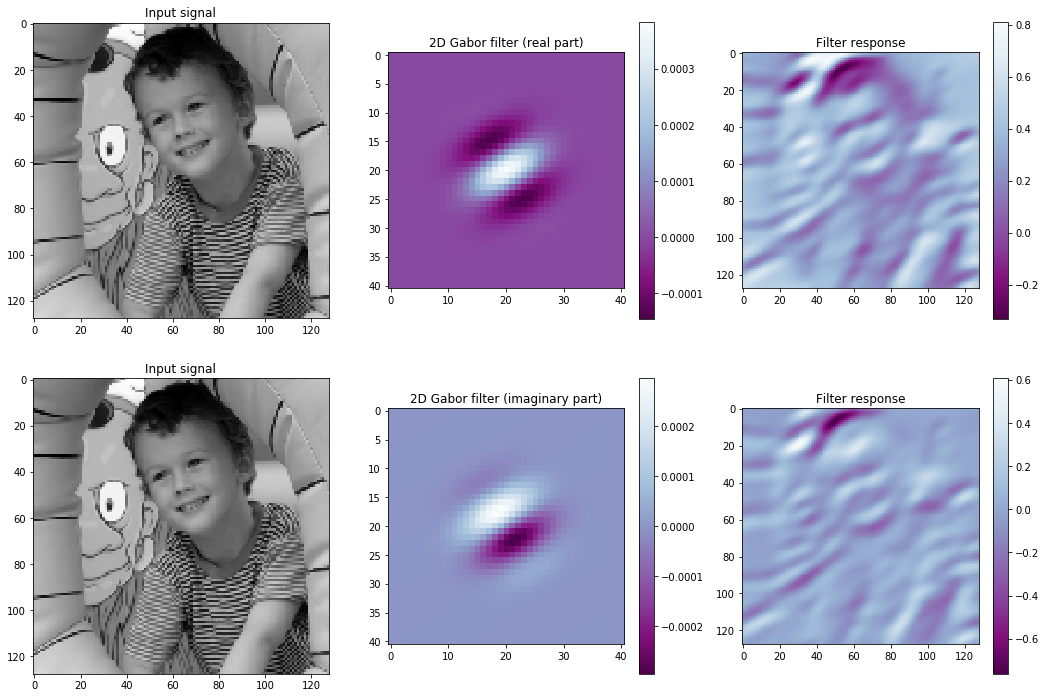

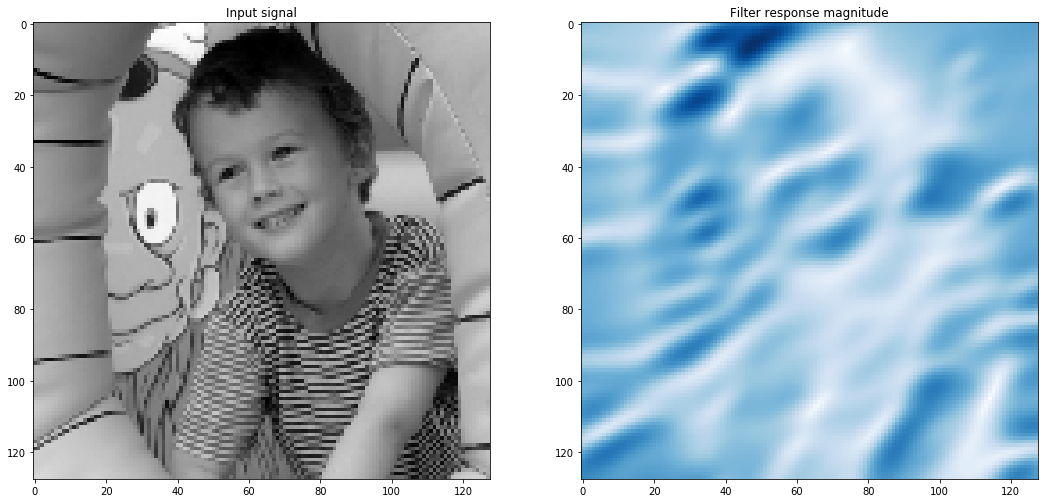

In [69]:
# bishop
params = {"freqs": 32/max(PIX_W,PIX_H),
           "dir": -2 * math.pi / 3,
           "amp": 0.1,
           "sdev": max(PIX_W,PIX_H)/70,
           "phase": 0}

path = "img/bishop.png"

draw_heatmap(path, params, 3)

Convolving w/ real part (takes time)... OK.
Convolving w/ imaginary part (takes time)... OK.


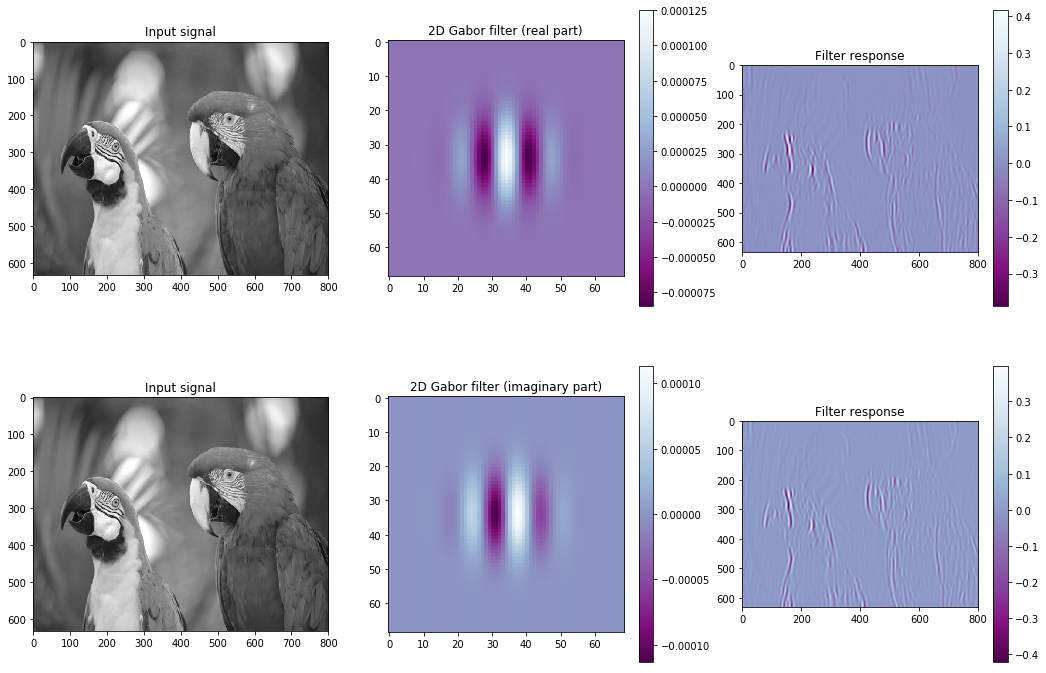

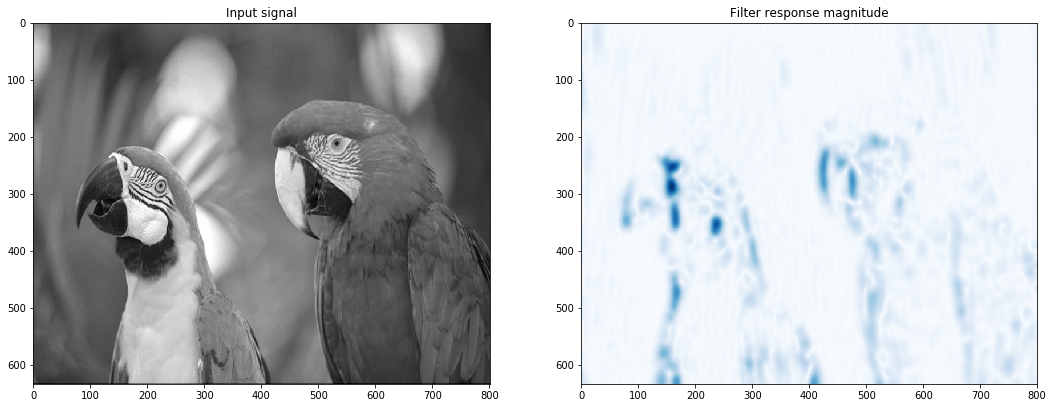

In [76]:
# parrots
params = {"freqs": 32/max(PIX_W,PIX_H),
           "dir": 0,
           "amp": 0.1,
           "sdev": max(PIX_W,PIX_H)/40,
           "phase": 0}

path = "img/parrots.png"

draw_heatmap(path, params, 3)